In [88]:
## 基础工具
import numpy as np
import pandas as pd
import warnings
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import jn
from IPython.display import display, clear_output
import time

warnings.filterwarnings('ignore')
%matplotlib inline

## 模型预测的
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

## 数据降维处理的
from sklearn.decomposition import PCA,FastICA,FactorAnalysis,SparsePCA

import lightgbm as lgb
import xgboost as xgb

## 参数搜索和评价的
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold,train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [89]:
import datacompy

In [9]:
## 通过Pandas对于数据进行读取 (pandas是一个很友好的数据读取函数库)
train_data = pd.read_csv('data/used_car_train_20200313.csv', sep=' ')
testb_data = pd.read_csv('data/used_car_testB_20200421.csv', sep=' ')


In [10]:
print('train data shape:', train_data.shape)
print('testb data shape:', testb_data.shape)

train data shape: (150000, 31)
testb data shape: (50000, 30)


In [11]:
train_data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14'],
      dtype='object')

In [12]:
train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [13]:
testb_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,200000,133777,20000501,67.0,0,1.0,0.0,0.0,101,15.0,...,0.236520,0.000241,0.105319,0.046233,0.094522,3.619512,-0.280607,-2.019761,0.978828,0.803322
1,200001,61206,19950211,19.0,6,2.0,0.0,0.0,73,6.0,...,0.261518,0.000000,0.120323,0.046784,0.035385,2.997376,-1.406705,-1.020884,-1.349990,-0.200542
2,200002,67829,20090606,5.0,5,4.0,0.0,0.0,120,5.0,...,0.261691,0.090836,0.000000,0.079655,0.073586,-3.951084,-0.433467,0.918964,1.634604,1.027173
3,200003,8892,20020601,22.0,9,1.0,0.0,0.0,58,15.0,...,0.236050,0.101777,0.098950,0.026830,0.096614,-2.846788,2.800267,-2.524610,1.076819,0.461610
4,200004,76998,20030301,46.0,6,0.0,NaN,0.0,116,15.0,...,0.257000,0.000000,0.066732,0.057771,0.068852,2.839010,-1.659801,-0.924142,0.199423,0.451014


## 数据清洗

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [15]:
testb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SaleID             50000 non-null  int64  
 1   name               50000 non-null  int64  
 2   regDate            50000 non-null  int64  
 3   model              50000 non-null  float64
 4   brand              50000 non-null  int64  
 5   bodyType           48496 non-null  float64
 6   fuelType           47076 non-null  float64
 7   gearbox            48032 non-null  float64
 8   power              50000 non-null  int64  
 9   kilometer          50000 non-null  float64
 10  notRepairedDamage  50000 non-null  object 
 11  regionCode         50000 non-null  int64  
 12  seller             50000 non-null  int64  
 13  offerType          50000 non-null  int64  
 14  creatDate          50000 non-null  int64  
 15  v_0                50000 non-null  float64
 16  v_1                500

In [20]:
compare = datacompy.Compare(train_data, testb_data, join_columns="SaleID")
print(compare.report())

DataComPy Comparison
--------------------

DataFrame Summary
-----------------

  DataFrame  Columns    Rows
0       df1       31  150000
1       df2       30   50000

Column Summary
--------------

Number of columns in common: 30
Number of columns in df1 but not in df2: 1
Number of columns in df2 but not in df1: 0

Row Summary
-----------

Matched on: saleid
Any duplicates on match values: No
Absolute Tolerance: 0
Relative Tolerance: 0
Number of rows in common: 0
Number of rows in df1 but not in df2: 150,000
Number of rows in df2 but not in df1: 50,000

Number of rows with some compared columns unequal: 0
Number of rows with all compared columns equal: 0

Column Comparison
-----------------

Number of columns compared with some values unequal: 0
Number of columns compared with all values equal: 30
Total number of values which compare unequal: 0

Sample Rows Only in df1 (First 10 Columns)
------------------------------------------

        saleid      name     regdate  model  brand  bo

In [21]:
'price' in train_data.columns

True

In [22]:
'price' in testb_data.columns

False

训练数据和测试数据的列中，测试数据没有“price”列，其他的列都是相似的

In [24]:
# 对dataframe的列的类型、样本、不同值的数量， 缺失值的比例
def df_dtype(data):
    cols, dtype_col, specimens, nunique, null_count,null_share = [], [], [], [], [],[]
    for column in data.columns:
        cols.append(column)
        this_dtype = data[column].dtype
        dtype_col.append(this_dtype)
        specimen = data.loc[data[column].first_valid_index(), column]
        specimens.append(specimen)
        this_nunique = data[column].nunique()
        nunique.append(this_nunique)
        null_sum = data[column].isna().sum()
        null_count.append(null_sum)
        null_percent = null_sum/len(data[column])
        null_share.append(f'{null_percent:.2%}')
    
    df = pd.DataFrame(list(zip(
            dtype_col,
            specimens,
            nunique,
            null_count,
            null_share
        )), index = cols)
    
    df.columns = [
        'dtype',
        'specimen',
        'nunique',
        'null_count',
        'null_share'
    ]
    return df

In [25]:
df_dtype(train_data)

,dtype,specimen,nunique,null_count,null_share
saleid,int64,0,150000,0,0.00%
name,int64,736,99662,0,0.00%
regdate,int64,20040402,3894,0,0.00%
model,float64,30.0,248,1,0.00%
brand,int64,6,40,0,0.00%
bodytype,float64,1.0,8,4506,3.00%
fueltype,float64,0.0,7,8680,5.79%
gearbox,float64,0.0,2,5981,3.99%
power,int64,60,566,0,0.00%
kilometer,float64,12.5,13,0,0.00%


In [26]:
df_dtype(testb_data)

,dtype,specimen,nunique,null_count,null_share
saleid,int64,200000,50000,0,0.00%
name,int64,133777,37536,0,0.00%
regdate,int64,20000501,3819,0,0.00%
model,float64,67.0,245,0,0.00%
brand,int64,0,40,0,0.00%
bodytype,float64,1.0,8,1504,3.01%
fueltype,float64,0.0,7,2924,5.85%
gearbox,float64,0.0,2,1968,3.94%
power,int64,101,427,0,0.00%
kilometer,float64,15.0,13,0,0.00%


可以看到 bodyType、fuelType、gearbox这三个属性在训练集和测试集上都有缺失其他属性没有缺失值

power的值需要在[0, 600]内，所以先删除一下异常数据

In [51]:
train_data[(train_data['power']<0) | (train_data['power']>600)].power

221         740
534        7515
919        1398
4077        601
4398       1771
          ...  
148030      776
148246     2598
148365    17700
148665    19312
149251      680
Name: power, Length: 143, dtype: int64

In [56]:
train_data.drop(index=train_data[(train_data['power']<0) | (train_data['power']>600)].index, inplace=True)

<Axes: >

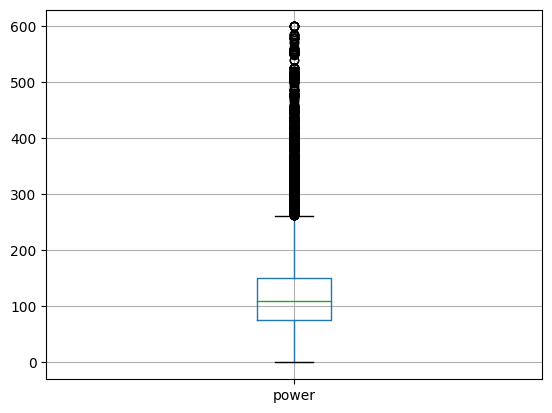

In [57]:
train_data[['power']].boxplot()

In [58]:
train_data.power.describe()

count    149857.000000
mean        116.399941
std          68.500152
min           0.000000
25%          75.000000
50%         110.000000
75%         150.000000
max         600.000000
Name: power, dtype: float64

去除非正常数据后

In [59]:
df_dtype(train_data)

,dtype,specimen,nunique,null_count,null_share
saleid,int64,0,149857,0,0.00%
name,int64,736,99538,0,0.00%
regdate,int64,20040402,3894,0,0.00%
model,float64,30.0,248,1,0.00%
brand,int64,6,40,0,0.00%
bodytype,float64,1.0,8,4499,3.00%
fueltype,float64,0.0,7,8659,5.78%
gearbox,float64,0.0,2,5973,3.99%
power,int64,60,445,0,0.00%
kilometer,float64,12.5,13,0,0.00%


缺失值的处理

使用相同车型、相同品牌来填写bodytype

In [29]:
train_data['notrepaireddamage'].unique()

array(['0.0', '-', '1.0'], dtype=object)

<Axes: >

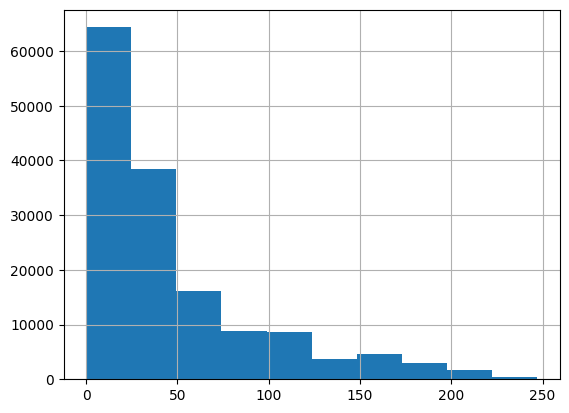

In [30]:
train_data.model.hist()

<Axes: >

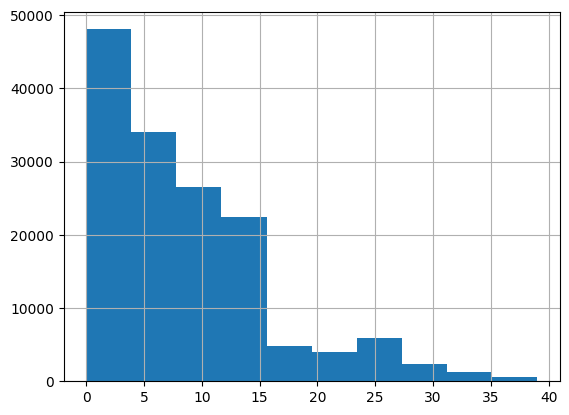

In [31]:
train_data.brand.hist()

model有一条数据是缺失的，直接删除

In [65]:
train_data.drop(index=train_data[(train_data['model'].isna())].index, inplace=True)

In [34]:
train_data.bodytype.describe()

count    145494.000000
mean          1.792369
std           1.760640
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max           7.000000
Name: bodytype, dtype: float64

In [36]:
train_data.bodytype.unique()

array([ 1.,  2.,  0.,  5.,  3., nan,  6.,  7.,  4.])

<Axes: >

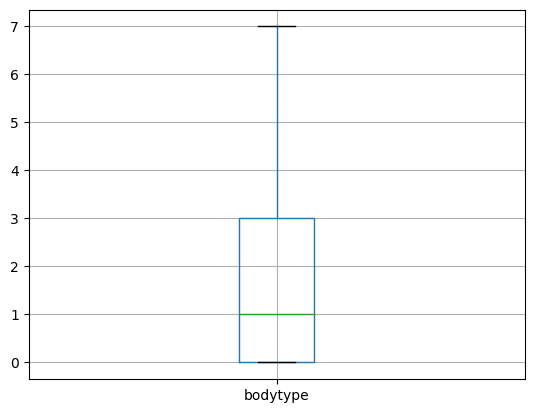

In [61]:
train_data[['bodytype']].boxplot()

<Axes: >

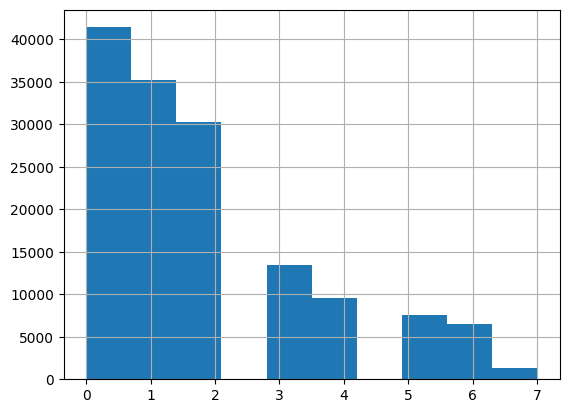

In [33]:
train_data.bodytype.hist()

可以使用0：豪华轿车来填补缺失值

In [63]:
train_data.bodytype.fillna(0, inplace=True)

In [66]:
df_dtype(train_data)

,dtype,specimen,nunique,null_count,null_share
saleid,int64,0,149856,0,0.00%
name,int64,736,99537,0,0.00%
regdate,int64,20040402,3894,0,0.00%
model,float64,30.0,248,0,0.00%
brand,int64,6,40,0,0.00%
bodytype,float64,1.0,8,0,0.00%
fueltype,float64,0.0,7,8659,5.78%
gearbox,float64,0.0,2,5973,3.99%
power,int64,60,445,0,0.00%
kilometer,float64,12.5,13,0,0.00%


In [38]:
train_data.fueltype.unique()

array([ 0.,  1., nan,  2.,  3.,  4.,  5.,  6.])

In [39]:
train_data.fueltype.nunique()

7

<Axes: >

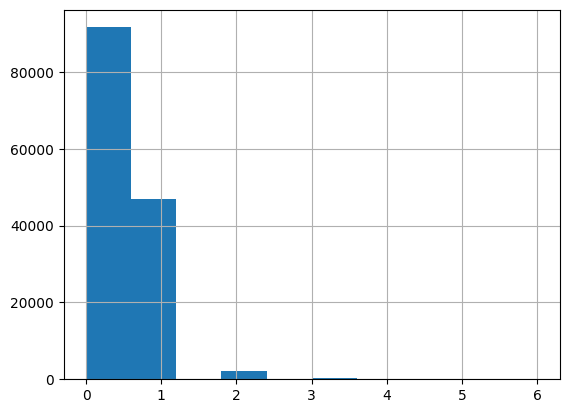

In [44]:
train_data.fueltype.hist()

In [45]:
train_data.fueltype.describe()

count    141320.000000
mean          0.375842
std           0.548677
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           6.000000
Name: fueltype, dtype: float64

使用最频繁的值0：汽油填写fuletype缺失的值

In [69]:
train_data.fueltype.fillna(0, inplace=True)

查看变速箱 gearbox的信息

In [70]:
train_data.gearbox.unique()

array([ 0.,  1., nan])

In [71]:
train_data.gearbox.nunique()

2

<Axes: >

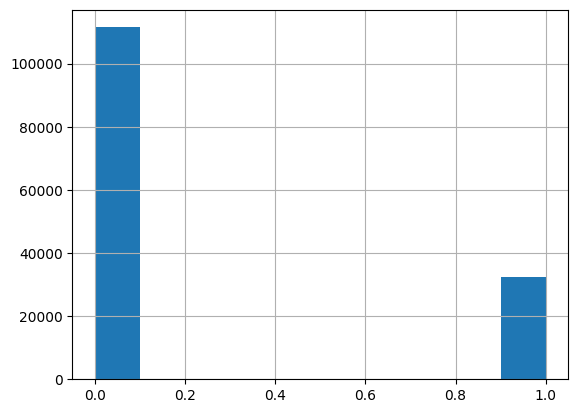

In [72]:
train_data.gearbox.hist()

使用0来填缺失值

In [73]:
train_data.gearbox.fillna(0, inplace=True)

In [75]:
df_dtype(train_data)

,dtype,specimen,nunique,null_count,null_share
saleid,int64,0,149856,0,0.00%
name,int64,736,99537,0,0.00%
regdate,int64,20040402,3894,0,0.00%
model,float64,30.0,248,0,0.00%
brand,int64,6,40,0,0.00%
bodytype,float64,1.0,8,0,0.00%
fueltype,float64,0.0,7,0,0.00%
gearbox,float64,0.0,2,0,0.00%
power,int64,60,445,0,0.00%
kilometer,float64,12.5,13,0,0.00%


### 特征选择

（1）先使用数值类型的特征值

In [77]:
numerical_cols = train_data.select_dtypes(exclude = 'object').columns
print(numerical_cols)

Index(['saleid', 'name', 'regdate', 'model', 'brand', 'bodytype', 'fueltype',
       'gearbox', 'power', 'kilometer', 'regioncode', 'seller', 'offertype',
       'creatdate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')


In [79]:
categorical_cols = train_data.select_dtypes(include = 'object').columns
print(categorical_cols)

Index(['notrepaireddamage'], dtype='object')


In [81]:
## 选择特征列
feature_cols = [col for col in numerical_cols if col not in ['SaleID','name','regDate','creatDate','price','model','brand','regionCode','seller']]
feature_cols = [col for col in feature_cols if 'Type' not in col]

## 提前特征列，标签列构造训练样本和测试样本
X_data = train_data[feature_cols]
Y_data = train_data['price']

X_test  = testb_data[feature_cols]

print('X train shape:',X_data.shape)
print('X test shape:',X_test.shape)

X train shape: (149856, 25)
X test shape: (50000, 25)


In [82]:
## 定义了一个统计函数，方便后续信息统计
def Sta_inf(data):
    print('_min',np.min(data))
    print('_max:',np.max(data))
    print('_mean',np.mean(data))
    print('_ptp',np.ptp(data))
    print('_std',np.std(data))
    print('_var',np.var(data))

### 查看标签

In [83]:
print('Sta of label:')
Sta_inf(Y_data)

Sta of label:
_min 11
_max: 99999
_mean 5919.519685564809
_ptp 99988
_std 7480.832429967333
_var 55962853.84525095


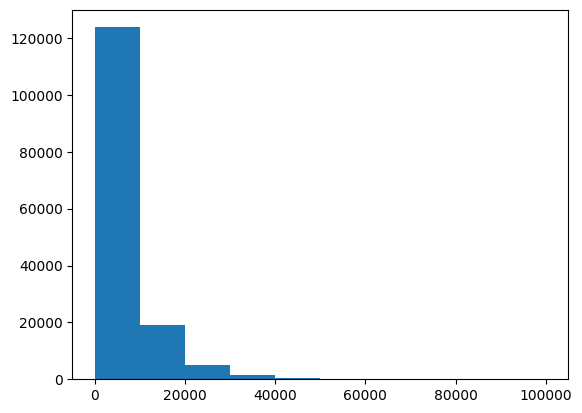

In [84]:
## 绘制标签的统计图，查看标签分布
plt.hist(Y_data)
plt.show()
plt.close()

### 模型训练与预测

In [85]:
## xgb-Model
xgr = xgb.XGBRegressor(n_estimators=120, learning_rate=0.1, gamma=0, subsample=0.8,\
        colsample_bytree=0.9, max_depth=7) #,objective ='reg:squarederror'

scores_train = []
scores = []

## 5折交叉验证方式
sk=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
for train_ind,val_ind in sk.split(X_data,Y_data):
    
    train_x=X_data.iloc[train_ind].values
    train_y=Y_data.iloc[train_ind]
    val_x=X_data.iloc[val_ind].values
    val_y=Y_data.iloc[val_ind]
    
    xgr.fit(train_x,train_y)
    pred_train_xgb=xgr.predict(train_x)
    pred_xgb=xgr.predict(val_x)
    
    score_train = mean_absolute_error(train_y,pred_train_xgb)
    scores_train.append(score_train)
    score = mean_absolute_error(val_y,pred_xgb)
    scores.append(score)

print('Train mae:',np.mean(score_train))
print('Val mae',np.mean(scores))

Train mae: 541.066153703996
Val mae 636.0012887587602


In [98]:
import torch
import torchvision
from xgboost import XGBClassifier
xgbc_model=XGBClassifier()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_data = le.fit_transform(Y_data)

device = torch.device("cuda") # 使用gpu训练 
device = torch.device("cuda:0") # 当电脑中有多张显卡时，使用第一张


# 随机森林
from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier()

# ET
from sklearn.ensemble import ExtraTreesClassifier
et_model=ExtraTreesClassifier()


#逻辑回归
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()

lr_model=lr_model.to(device)
X_data = X_data.to(device)
Y_data = Y_data.to(device)

# 逻辑回归
lr_model.fit(X_data,Y_data)




from sklearn.model_selection import cross_val_score
print("\n使用５折交叉验证方法得随机森林模型的准确率（每次迭代的准确率的均值）：")

print("\t逻辑回归：",cross_val_score(lr_model,X_data,Y_data,cv=5).mean())


AttributeError: 'LogisticRegression' object has no attribute 'to'

In [96]:
torch.cuda.is_available()

True

In [97]:
device = torch.device("cuda") # 使用gpu训练 
device = torch.device("cuda:0") # 当电脑中有多张显卡时，使用第一张
device

device(type='cuda', index=0)